In [1]:
# coding: utf-8

import sys
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import feature
import utils

In [2]:
img_list = utils.load_images('../input_image/parrington')
cylinder_img_list = [utils.cylindrical_projection(img, 706) for img in img_list]

In [3]:
corner_r = feature.harris_corner(cylinder_img_list[0])
descriptors1, pos1 = feature.extract_description(cylinder_img_list[0], corner_r, kernel=5)

In [4]:
corner_r2 = feature.harris_corner(cylinder_img_list[1])
descriptors2, pos2 = feature.extract_description(cylinder_img_list[1], corner_r2, kernel=5)

In [5]:
mp = feature.matching(descriptors1, descriptors2, pos1, pos2)

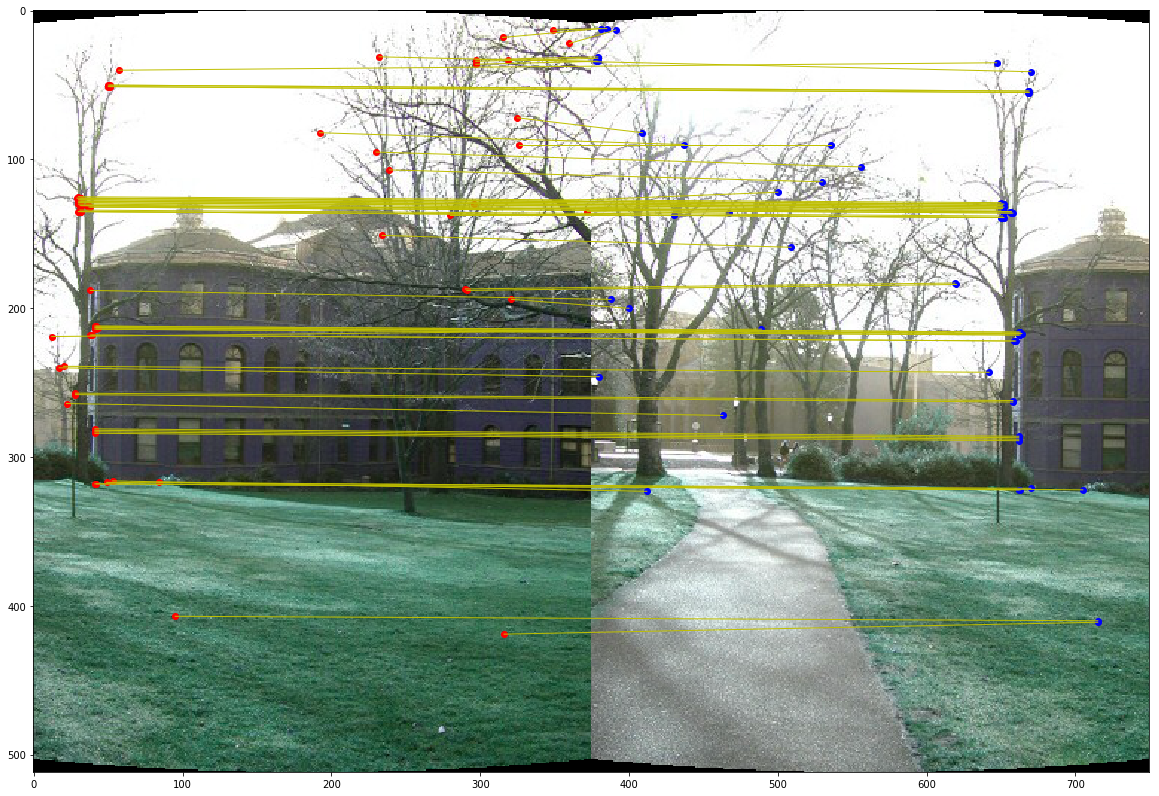

In [10]:
_, offset, _ = cylinder_img_list[0].shape
plt_img = np.concatenate((cylinder_img_list[0], cylinder_img_list[1]), axis=1)
plt.figure(figsize=(20,20))
plt.imshow(plt_img)
for i in range(len(mp)):
    plt.scatter(x=mp[i][0][1], y=mp[i][0][0], c='r')
    plt.plot([mp[i][0][1], offset+mp[i][1][1]], [mp[i][0][0], mp[i][1][0]], 'y-', lw=1)
    plt.scatter(x=offset+mp[i][1][1], y=mp[i][1][0], c='b')
plt.show()